## Linear Congruential Generator

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def lcg(n):
    """
    n: number of prns
    """
    
    a = 1664525
    c = 1013904223
    m = 2**32
    prns = np.zeros(n + 1)
        
    for i in range(n):
        prns[i + 1] = (a * prns[i] + c) % m

    return prns[1:] / m

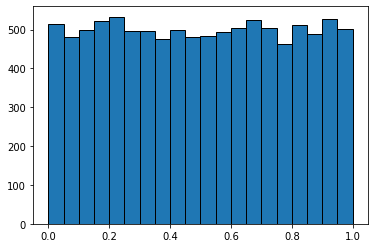

In [10]:
plt.hist(lcg(10000), bins=20, edgecolor='black')
plt.show()

# Inverse Transform Sampling For Exponential Function
Probability density function: $\rho(x) = \lambda e^{-\lambda x}$

Cumulative distribution function (CDF): $1 - e^{-\lambda x}$

Inverse CDF: $\frac{1}{\lambda} \ln (1 - y)$

In [14]:
def icdf_exp(y):
    return np.log(1 - y) / 0.5

unif_nums = lcg(1000)
exp_nums = [icdf_exp(y) for y in unif_nums]

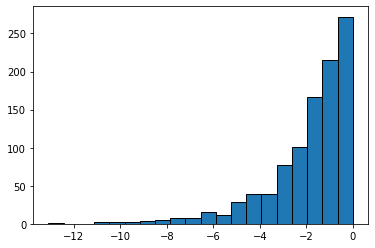

In [15]:
plt.hist(exp_nums, bins=20, edgecolor='black')
plt.show()

# Inverse Transform Sampling For A Biased Coin
Consider the biased coin that lands heads (0) with probability $\frac{1}{3}$ and tails (1) with probability $\frac{2}{3}$.

In [17]:
def icdf_coin(y):
    if y >= 0 and y < 1./3:
        return 0
    else:
        return 1

In [18]:
coin_toss = [icdf_coin(y) for y in unif_nums]

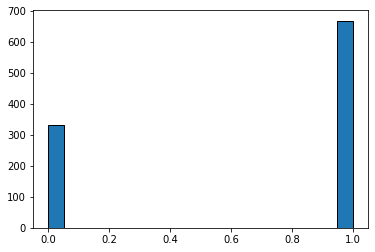

In [19]:
plt.hist(coin_toss, bins=20, edgecolor='black')
plt.show()